In [1]:
import numpy as np
from numpy import dot
from numpy import mod, exp
from numpy import linalg
import scipy
import matplotlib.pyplot as plt

In [3]:
import scipy.integrate as inte #simpson integration

In [4]:
inte.simpson

<function scipy.integrate._quadrature.simpson(y, x=None, dx=1.0, axis=-1, even='avg')>

### Defining the intial vector

In [5]:
v=np.ndarray((2,3))
v[0,:]=[1,1,0]
v[1,:]=[1,2,3]

#### Grahm Schmidt method

In [6]:
u=np.ndarray((2,3))
u[0,:]=[0,0,0]
u[1,:]=[0,0,0]

### Start from here

In [7]:
x=np.linspace(-1,1,1000)
global k
k=(x[-1]-x[0])/len(x)

def xn(x,n):
    return x**n

In [8]:
z= 5 # enter the order of legendre polynomials you wish to generate
v=np.zeros((z,1000))
for i in range(z):
    v[i]=xn(x,i)
u=np.zeros((z,1000))
u=u*0

In [9]:
def innerproduct(a,b,k): #where k is the spacing difference between the points
    p=a*b
    return inte.simpson(y=p,dx=k) 

In [10]:
def grsm(v,u,n,innerproduct): # the grahm-schmidt method of generation of orthogoal basis
    u[0]=v[0]/(innerproduct(v[0],v[0],k) **.5)
    for i in range(1,n):
        m=v[i]
        #print(np.shape(m))
        for j in range(i):
            m -= innerproduct(v[i],u[j],k)*u[j] 
            
        u[i]=m/(innerproduct(m,m,k)**.5)
    return u

In [11]:
q=grsm(v,u,z,innerproduct)


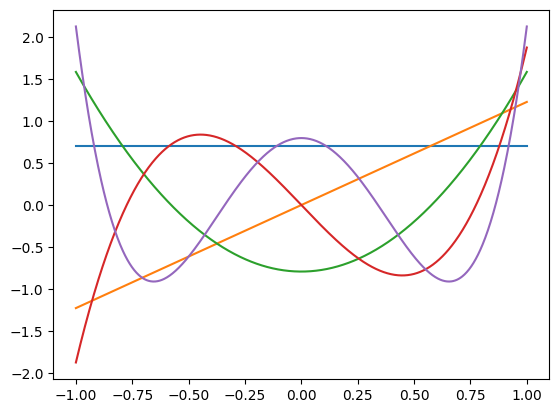

In [12]:
for i in range(z): #generating the Legende polynomials 
    plt.plot(x,q[i])
    #plt.ylim(-0.05,0.05)

#### Fitting it on the exponential fucntion

In [11]:
def ex(x):
    return exp(x)

In [12]:
m=0 #expressing the fucntion in terms of the z legendre polynomials generated
for i in range(z):
    m+= innerproduct(ex(x),u[i],k)*u[i]

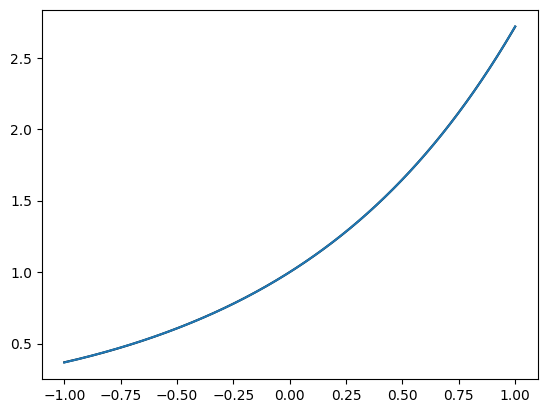

In [14]:
plt.plot(x,m,color='black')
plt.plot(x,ex(x))